Dataset Sample:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2

Dataset Dimensions: (150, 4)

Reduced Dataset:
        PC1       PC2  Target
0 -2.684126  0.319397       0
1 -2.714142 -0.177001       0
2 -2.888991 -0.144949       0
3 -2.745343 -0.318299       0
4 -2.728717  0.326755       0


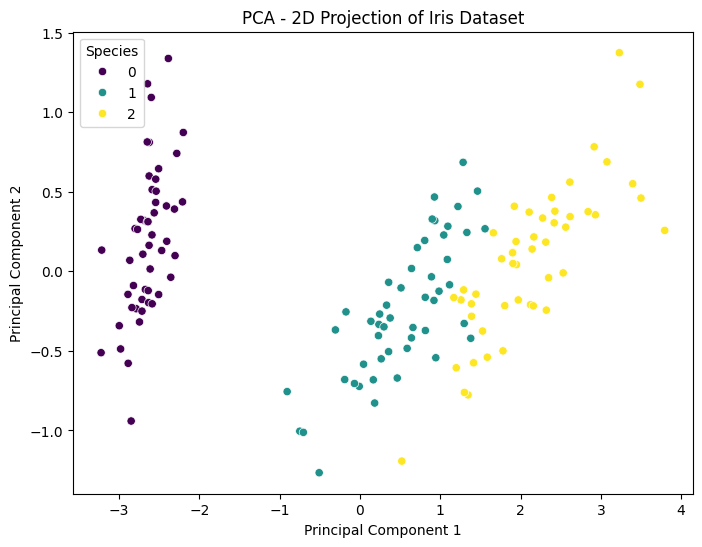

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris

iris_data=load_iris()
df=pd.DataFrame(iris_data.data,columns=iris_data.feature_names)

print("Dataset Sample:")
print(df.head())

print("\nDataset Dimensions:",df.shape)

pca=PCA(n_components=2)
df_pca=pca.fit_transform(df)

df_pca=pd.DataFrame(df_pca,columns=['PC1','PC2'])
df_pca['Target']=iris_data.target 

print("\nReduced Dataset:")
print(df_pca.head())

plt.figure(figsize=(8,6))
sns.scatterplot(x=df_pca['PC1'],y=df_pca['PC2'],hue=df_pca['Target'],palette='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA - 2D Projection of Iris Dataset')
plt.legend(title="Species")
plt.show()


Stock Data Sample:
              Open   Close  Volume
Date                              
2025-07-01  154.88  159.67    5984
2025-07-02  171.52  174.51    5353
2025-07-03  160.28  159.89    9622
2025-07-04  154.49  157.30    8250
2025-07-05  142.37  138.55    5187

Missing Values:
Open      0
Close     0
Volume    0
dtype: int64


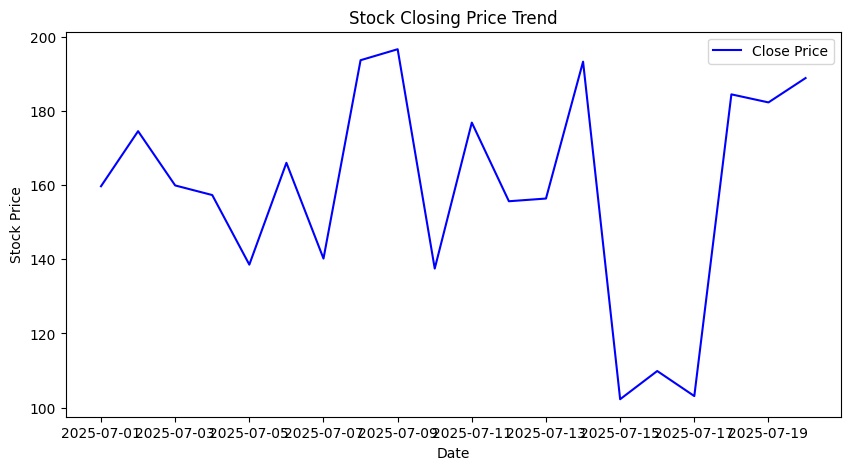


Dataset with Lag Features:
              Open   Close  Volume  Prev_Close
Date                                          
2025-07-02  171.52  174.51    5353      159.67
2025-07-03  160.28  159.89    9622      174.51
2025-07-04  154.49  157.30    8250      159.89
2025-07-05  142.37  138.55    5187      157.30
2025-07-06  164.59  165.99    3659      138.55

Forecasted Prices:
2025-07-21    186.350533
2025-07-22    187.280147
2025-07-23    186.930200
2025-07-24    187.061935
2025-07-25    187.012345
2025-07-26    187.031013
2025-07-27    187.023985
2025-07-28    187.026631
2025-07-29    187.025635
2025-07-30    187.026010
Freq: D, Name: predicted_mean, dtype: float64


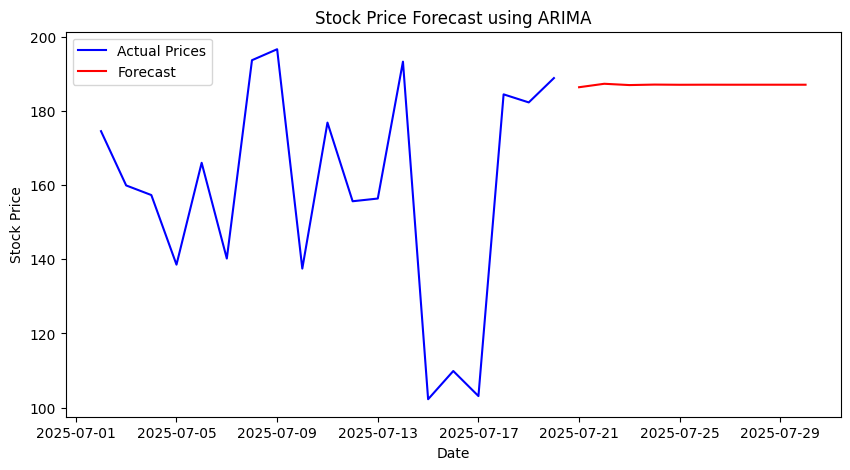

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA

df=pd.read_csv("stock_prices.csv",parse_dates=['Date'],index_col='Date')
df.index = pd.to_datetime(df.index)
df = df.asfreq('D')

print("Stock Data Sample:")
print(df.head())

print("\nMissing Values:")
print(df.isnull().sum())

plt.figure(figsize=(10,5))
plt.plot(df.index,df['Close'],label="Close Price",color='blue')
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.title("Stock Closing Price Trend")
plt.legend()
plt.show()

df['Prev_Close']=df['Close'].shift(1)

df.dropna(inplace=True)

print("\nDataset with Lag Features:")
print(df.head())

model=ARIMA(df['Close'],order=(1,1,0))
model_fit=model.fit()

forecast=model_fit.forecast(steps=10)
print("\nForecasted Prices:")
print(forecast)

plt.figure(figsize=(10,5))
plt.plot(df.index,df['Close'],label="Actual Prices",color='blue')
plt.plot(pd.date_range(start=df.index[-1],periods=11,freq='D')[1:],forecast,label="Forecast",color='red')
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.title("Stock Price Forecast using ARIMA")
plt.legend()
plt.show()